In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
dataset1 = pd.read_csv('C:/Users/pjh45/OneDrive/바탕 화면/상관분석_매출통합_csv.csv')

In [51]:
X_dataset=dataset1.drop(columns=['year','session','total_sale','s_zone','s_zone_code','s_zone_name'])
y_dataset=dataset1['total_sale']

In [52]:
len(X_dataset)

21772

In [53]:
# X_test=X_dataset[:1086]
# X_train=X_dataset[2174:]
# X_val=X_dataset[1086:2174]
# y_val=y_dataset[1086:2174]
# y_test=y_dataset[:1086]
# y_train=y_dataset[2174:]

### 상권 코드가 같은 상권은 같은 클러스터를 가지는 것을 전제로 클러스터링을 진행하였습니다.
### 2017년 1분기 데이터로 클러스터링을 진행하여 나머지 데이터셋에도 같은 상권코드를 가진 데이터에는 같은 라벨을 부여할 것입니다.

In [54]:
X_train=X_dataset[20683:] #2017년 1분기 데이터
y_train=y_dataset[20683:]

In [55]:
scaler = MinMaxScaler((-1,1)) #스케일링
scaler.fit(X_train)
train_data_scaled = scaler.transform(X_train)

# K-mean Clustering

In [56]:
cluster_num=[2,3,4,5,6]

for i in cluster_num:
    kmeans = KMeans(n_clusters=i, random_state=10)
    cluster_labels = kmeans.fit_predict(train_data_scaled)

In [57]:
cluster_num=[2,3,4,5,6]
sil_scores = []
inertia = []

for n_clusters in cluster_num:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(train_data_scaled)
    
    sil_scores.append(silhouette_score(train_data_scaled, cluster_labels))

In [58]:
sil_scores

[0.2450350462610651,
 0.15926123871172318,
 0.15991833982318324,
 0.1608851036178405,
 0.08194821086106524]

Text(0.5, 1.0, 'Silhouette Score')

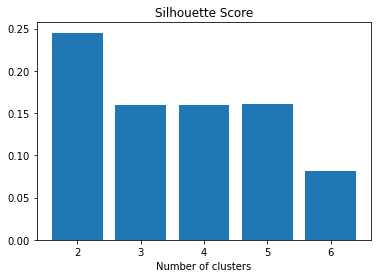

In [59]:
import matplotlib.pyplot as plt
plt.bar(range(2,7), sil_scores,)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

### 실루엣 점수 높은 모델 재학습

In [60]:
kmeans = KMeans(n_clusters=2, random_state=10)
cluster_labels = kmeans.fit_predict(train_data_scaled)

In [61]:
import numpy as np
aa =kmeans.predict(train_data_scaled)  #예측
bb=aa.tolist()
bb.count(0)
# len(X_test)

756

In [62]:
len(train_data_scaled)

1089

In [63]:
labels=kmeans.predict(train_data_scaled)

In [64]:
label = pd.DataFrame({'label':labels})

In [ ]:
label.to_csv('C:/Users/pjh45/OneDrive/바탕 화면/label1.csv', mode='w') #데이터 포인트별 라벨 엑셀로 저장

# Agglomerative Clustering

In [66]:
from sklearn.cluster import AgglomerativeClustering

sil_scores = []
linkage=["ward","complete","average","single"]

for i in linkage:
    for n_clusters in range(2,10):
            agg = AgglomerativeClustering(n_clusters=n_clusters,linkage=i)
            cluster_labels = agg.fit_predict(train_data_scaled)
            sil_scores.append(silhouette_score(train_data_scaled, cluster_labels))
 
   

pd.DataFrame({"linkage":sorted(linkage*8),"n_cluster":[2,3,4,5,6,7,8,9]*4,'silhoutte score':sil_scores})

,linkage,n_cluster,silhoutte score
0,average,2,0.189930
1,average,3,0.157654
2,average,4,0.161365
3,average,5,0.169188
4,average,6,0.175090
5,average,7,0.039399
6,average,8,0.042686
7,average,9,0.039863
8,complete,2,0.326186
9,complete,3,0.320665


Text(0.5, 1.0, 'Silhouette Score')

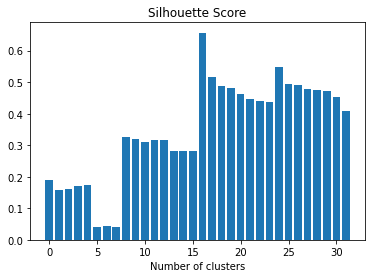

In [67]:
#sil_scores 그래프
plt.bar(range(32), sil_scores )
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

### 실루엣 스코어 가장 높게 것으로 하이퍼파라미터 선정하여 모델 재학습 (n_clusters=2,linkage="single")

In [68]:
agg = AgglomerativeClustering(n_clusters=2,linkage="single")
cluster_labels = agg.fit_predict(train_data_scaled)

In [74]:
import numpy as np
aa =cluster_labels  #예측
bb=aa.tolist()
bb.count(0)
# len(X_test)

1088

In [70]:
len(train_data_scaled)

1089

### 실루엣 스코어 가장 높았지만 1089 중 1088개가 한 군집으로 클러스터링 되었습니다.  
### 두번째로 실루엣 스코어가 높았던  (n_clusters=2,linkage="ward") 로 모델 재학습

In [79]:
agg = AgglomerativeClustering(n_clusters=2,linkage="ward")
cluster_labels = agg.fit_predict(train_data_scaled)

In [80]:
import numpy as np
aa =cluster_labels  #예측
bb=aa.tolist()
bb.count(0)
# len(X_test)

401

In [81]:
len(train_data_scaled)

1089

#### 1089 중 401개가 클러스터0으로 나누어졌다 ok!

In [83]:
labels=cluster_labels

In [84]:
label = pd.DataFrame({'label':labels})

In [ ]:
label.to_csv('C:/Users/pjh45/OneDrive/바탕 화면/label2.csv', mode='w') #라벨 엑셀로 저장

# DBSCAN

In [86]:
from sklearn.cluster import DBSCAN #실루엣 계수가 나오게 만든 코드
eps_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7]  
min_samples_list = [3,5,10,20,30,40,50,70,80,90]
sil_scores = []

eps_use = []
min_samples_use = []
num=0

for i in eps_list:
    for j in min_samples_list:
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(train_data_scaled)
        assignments_dbscan_labels = dbscan.labels_
        
        if len(set(dbscan.labels_)) != 1:
            print('eps:',i,'min_samples:',j)
            print(assignments_dbscan_labels)
            num = num+1
            print('\n')
            eps_use.append(i)
            min_samples_use.append(j)
            sil_scores.append(silhouette_score(train_data_scaled, dbscan.labels_))



eps: 0.35 min_samples: 3
[-1 -1 -1 ... -1 -1 -1]


eps: 0.4 min_samples: 3
[-1 -1 -1 ... -1 -1 -1]


eps: 0.4 min_samples: 5
[-1 -1 -1 ... -1 -1 -1]


eps: 0.5 min_samples: 3
[-1 -1 -1 ... -1 -1 -1]


eps: 0.5 min_samples: 5
[-1 -1 -1 ... -1 -1 -1]


eps: 0.5 min_samples: 10
[-1 -1 -1 ... -1 -1 -1]


eps: 0.5 min_samples: 20
[-1 -1 -1 ... -1 -1 -1]


eps: 0.6 min_samples: 3
[-1 -1  0 ... -1 -1 -1]


eps: 0.6 min_samples: 5
[-1 -1  2 ... -1 -1 -1]


eps: 0.6 min_samples: 10
[-1 -1 -1 ... -1 -1 -1]


eps: 0.6 min_samples: 20
[-1 -1 -1 ... -1 -1 -1]


eps: 0.6 min_samples: 30
[-1 -1 -1 ... -1 -1 -1]


eps: 0.6 min_samples: 40
[-1 -1 -1 ... -1 -1 -1]


eps: 0.6 min_samples: 50
[-1 -1 -1 ... -1 -1 -1]


eps: 0.7 min_samples: 3
[-1 -1  0 ... -1 -1 -1]


eps: 0.7 min_samples: 5
[-1 -1  0 ... -1 -1 -1]


eps: 0.7 min_samples: 10
[-1 -1  1 ... -1 -1 -1]


eps: 0.7 min_samples: 20
[-1 -1 -1 ... -1 -1 -1]


eps: 0.7 min_samples: 30
[-1 -1 -1 ... -1 -1 -1]


eps: 0.7 min_samples: 40
[-1 -1 -1 ... 

In [87]:
pd.DataFrame({'eps':eps_use, 'min_samples':min_samples_use,'silhoutte score':sil_scores})

,eps,min_samples,silhoutte score
0,0.35,3,-0.292218
1,0.40,3,-0.286886
2,0.40,5,-0.271692
3,0.50,3,-0.260339
4,0.50,5,-0.211581
5,0.50,10,-0.140371
6,0.50,20,-0.167624
7,0.60,3,-0.077055
8,0.60,5,-0.096872
9,0.60,10,-0.018726


Text(0.5, 1.0, 'Silhouette Score')

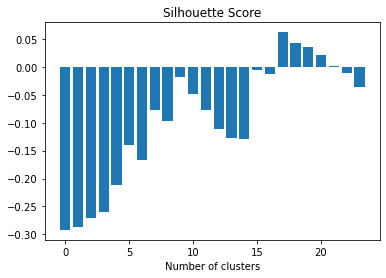

In [88]:
#sil_scores 그래프
plt.bar(range(0,24), sil_scores, )
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

In [89]:
dbscan = DBSCAN(eps=0.7, min_samples=20)
dbscan.fit(train_data_scaled)
assignments_dbscan_labels = dbscan.labels_
silhouette_score(train_data_scaled,dbscan.labels_)

0.062370699779799726

In [90]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

### 실루엣 스코어가 가장 높고 적절하게 나누어졌던 
### Agglomerative Clustering (n_clusters=2,linkage="ward")로 나누어진 군집으로 진행

###  같은 상권코드를 가진 데이터에는 같은 라벨을 부여하고 각 군집별로 과정 진행